In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
train['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [4]:
train['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [5]:
train['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [6]:
train['vendor_id'].corr(train['trip_duration'])

0.020304177490054781

In [7]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [11]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

## Month and hour are the only features I care about

In [14]:
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13


In [16]:
train['pickup_datetime'].dt.month.value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: pickup_datetime, dtype: int64

In [17]:
train['pickup_month'] = train['pickup_datetime'].dt.month
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,3


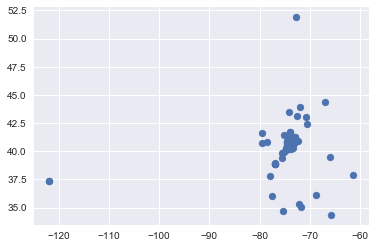

In [19]:
plt.scatter(train['pickup_longitude'], train['pickup_latitude'])

## Get the difference between Log and Lat of Pickup and Dropoff

In [21]:
train['longitude_difference'] = train['dropoff_longitude'] - train['pickup_longitude']
train['latitude_difference'] = train['dropoff_latitude'] - train['pickup_latitude']
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_month,longitude_difference,latitude_differenct,latitude_difference
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,3,0.017525,-0.002335,-0.002335
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,-0.019066,-0.007412,-0.007412
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1,-0.026306,-0.053852,-0.053852
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,4,-0.002228,-0.013252,-0.013252
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,3,0.000130,-0.010689,-0.010689


In [140]:
features = ['passenger_count', 'pickup_hour', 'pickup_month','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'longitude_difference', 'latitude_difference']
target = ['trip_duration']

In [141]:
X_train = train[features]
y_train = train[target]

In [142]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
test = pd.read_csv("test.csv")
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [144]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [145]:
test['pickup_month'] = test['pickup_datetime'].dt.month
test['pickup_hour'] = test['pickup_datetime'].dt.hour

In [146]:
test['longitude_difference'] = test['dropoff_longitude'] - test['pickup_longitude']
test['latitude_difference'] = test['dropoff_latitude'] - test['pickup_latitude']

In [147]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,pickup_hour,longitude_difference,latitude_difference
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,6,23,-0.002045,0.024651
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,6,23,0.004395,-0.024590
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,6,23,0.011276,-0.008060
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,6,23,-0.030357,-0.041431
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,6,23,0.008705,-0.005585


In [148]:
X_test = test[features]

In [149]:
predictions = lr.predict(X_test)

In [150]:
X_test['trip_duration'] = np.absolute(predictions)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [151]:
X_test.head()

,passenger_count,pickup_hour,pickup_month,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,longitude_difference,latitude_difference,trip_duration
0,1,23,6,-73.988129,40.732029,-73.990173,40.756680,-0.002045,0.024651,1049.461185
1,1,23,6,-73.964203,40.679993,-73.959808,40.655403,0.004395,-0.024590,1456.807190
2,1,23,6,-73.997437,40.737583,-73.986160,40.729523,0.011276,-0.008060,1048.654248
3,1,23,6,-73.956070,40.771900,-73.986427,40.730469,-0.030357,-0.041431,1025.899668
4,1,23,6,-73.970215,40.761475,-73.961510,40.755890,0.008705,-0.005585,969.825114


In [152]:
result = pd.concat([test, X_test], axis = 1)

In [153]:
result.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,...,passenger_count,pickup_hour,pickup_month,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,longitude_difference,latitude_difference,trip_duration
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,6,...,1,23,6,-73.988129,40.732029,-73.990173,40.756680,-0.002045,0.024651,1049.461185
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,6,...,1,23,6,-73.964203,40.679993,-73.959808,40.655403,0.004395,-0.024590,1456.807190
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,6,...,1,23,6,-73.997437,40.737583,-73.986160,40.729523,0.011276,-0.008060,1048.654248
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,6,...,1,23,6,-73.956070,40.771900,-73.986427,40.730469,-0.030357,-0.041431,1025.899668
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,6,...,1,23,6,-73.970215,40.761475,-73.961510,40.755890,0.008705,-0.005585,969.825114


In [154]:
submit = result[['id', 'trip_duration']]

In [155]:
submit.head()

,id,trip_duration
0,id3004672,1049.461185
1,id3505355,1456.807190
2,id1217141,1048.654248
3,id2150126,1025.899668
4,id1598245,969.825114


In [156]:
submit.to_csv('submissions.csv', sep=',', index = False)

In [139]:
submit[submit['trip_duration'] < 0]

,id,trip_duration


In [46]:
print(predictions[:20])
predictions.shape

[[ 1030.46522693]
 [  983.56059708]
 [  981.45641874]
 [ 1040.45682435]
 [  988.25047959]
 [ 1013.53964154]
 [  940.47679908]
 [ 1003.43816107]
 [  912.8443156 ]
 [  990.64978806]
 [ 1076.05117843]
 [  990.87873815]
 [ 1045.09586249]
 [ 1003.05363549]
 [  943.54354865]
 [  968.12707857]
 [  941.67943875]
 [ 1148.90371149]
 [ 1005.08084815]
 [  943.66650491]]


(625134, 1)

In [57]:
predictions_id = test['id']
predictions_id.shape

(625134,)

In [58]:
predictions_id[:20]

0     id3004672
1     id3505355
2     id1217141
3     id2150126
4     id1598245
5     id0668992
6     id1765014
7     id0898117
8     id3905224
9     id1543102
10    id3024712
11    id3665810
12    id1836461
13    id3457080
14    id3376065
15    id3008739
16    id0902216
17    id3564824
18    id0820280
19    id0775088
Name: id, dtype: object

In [59]:
predictions_id = np.asarray(predictions_id)

In [65]:
predictions_id = predictions_id.reshape(len(predictions_id), 1)

In [68]:
predictions_id.shape

(625134, 1)

In [74]:
predictions.shape

(625134, 1)

In [75]:
predictions_id.shape

(625134, 1)

In [76]:
predictions_id[:10]

array([['id3004672'],
       ['id3505355'],
       ['id1217141'],
       ['id2150126'],
       ['id1598245'],
       ['id0668992'],
       ['id1765014'],
       ['id0898117'],
       ['id3905224'],
       ['id1543102']], dtype=object)

array([[ 1030.46522693],
       [  983.56059708],
       [  981.45641874],
       [ 1040.45682435],
       [  988.25047959],
       [ 1013.53964154],
       [  940.47679908],
       [ 1003.43816107],
       [  912.8443156 ],
       [  990.64978806]])